<a href="https://colab.research.google.com/github/kawthar-mohammed/Usecase-7/blob/main/Copy_of_EDA__Usecase_7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [243]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [244]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [245]:
# !pip install ydata-profiling


In [246]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="player Profiling Report")

# profile.to_notebook_iframe()
# profile.to_file("player Profiling Report")

after generating profile report I undersatend that:

1-the current value of the player is highly correlated with the apperance,highest_value and minutes played.

2- assists and goals is highly correlated with each other.

3-goals conceded is highly overall correlated with clean sheets

4-games_injured is highly overall correlated with days_injured and highest_value.

### Data Quality Checks



#### 1. Reliability:
This dataset was generated by scraping data from Transfermarkt.

#### 2. Timeliness:
the dataset collectiog time is compatiable with spesified period.

#### 3. Consistency:



#### 4. Relevance:
the dataset sample is relevance with analysis opjective

#### 5. Uniqueness:
the dataset does not have duplicated values


#### 6. Completeness:
the datasset is complete

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 7. Check Accuracy
the data type for each columns is appropriate.


In [248]:
# check outliers
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [249]:
# Calculate z-scores for 'appearance'
df['zscore_appearance'] = np.abs(zscore(df['appearance']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_appearance'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_appearance', axis=1)


In [250]:
df['zscore_assists'] = np.abs(zscore(df['assists']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_assists'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_assists', axis=1)

In [251]:
df['zscore_goals'] = np.abs(zscore(df['goals']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_goals'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_goals', axis=1)

In [252]:
df['zscore_minutes played'] = np.abs(zscore(df['minutes played']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_minutes played'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_minutes played', axis=1)

In [253]:
df['zscore_days_injured'] = np.abs(zscore(df['days_injured']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_days_injured'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_days_injured', axis=1)

In [254]:
df['zscore_games_injured'] = np.abs(zscore(df['games_injured']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_games_injured'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_games_injured', axis=1)

In [255]:
df['zscore_award'] = np.abs(zscore(df['award']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_award'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_award', axis=1)

In [256]:
df['zscore_current_value'] = np.abs(zscore(df['current_value']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_current_value'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_current_value', axis=1)

In [257]:
df['zscore_highest_value'] = np.abs(zscore(df['highest_value']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_highest_value'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_highest_value', axis=1)

In [258]:
#delete columns.
df.drop(columns = ['player', 'name'],inplace = True)

In [259]:
df['position'].value_counts()

,count
position,
Defender Centre-Back,1626
Goalkeeper,1159
Attack Centre-Forward,1143
midfield-CentralMidfield,1009
midfield-DefensiveMidfield,799
Defender Right-Back,781
Defender Left-Back,742
midfield-AttackingMidfield,660
Attack-RightWinger,624


In [260]:
df['team'].value_counts()

,count
team,
Daejeon Hana Citizen,44
FC Seoul,43
Jeonbuk Hyundai Motors,43
Daegu FC,41
Gangwon FC,40
...,...
Gaziantep FK,6
Bayern Munich,5
Atlético de Madrid,4


In [261]:
df['position_encoded'].value_counts()
# we have position column that show same fact with more readable value

,count
position_encoded,
2,3182
3,2725
4,2470
1,1159


In [262]:
df.drop(columns = ['position_encoded'],inplace = True)

'highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals' and 'position_encoded' is highly correlaed with current_value.

In [263]:
#one hot encoding
df = pd.get_dummies(df, columns=['position','team'])

In [264]:
df.shape


(9536, 407)

In [265]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(current_value):
    if current_value < p35:
        return 'low_transfer_value'
    elif current_value < p75:
        return 'Good_transfer_value'
    else:
        return 'High_transfer_value'

# Apply the function to create a new column
df['current_value_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())

current_value_category
Good_transfer_value    4008
low_transfer_value     3139
High_transfer_value    2389
Name: count, dtype: int64


In [266]:
encoder = LabelEncoder()
df['current_value_category'] = encoder.fit_transform(df['current_value_category'])

In [267]:
df.shape

(9536, 407)

Prepare train and test data

#### 3. Feature selection

In [268]:
# sns.heatmap(df.corr(), annot=True);

In [269]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category    1.000000
position_Goalkeeper       0.144124
position_midfield         0.104103
goals conceded            0.093509
position_Attack           0.091086
                            ...   
days_injured             -0.145130
assists                  -0.152656
games_injured            -0.153481
minutes played           -0.233870
appearance               -0.253981
Name: current_value_category, Length: 407, dtype: float64


In [270]:
# Set the correlation threshold
threshold = 0.1  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category']) > \
threshold]['current_value_category'].index
selected_features

Index(['age', 'appearance', 'goals', 'assists', 'minutes played',
       'days_injured', 'games_injured', 'award', 'position_Goalkeeper',
       'position_midfield', 'current_value_category'],
      dtype='object')

In [271]:
selected_features.shape

(11,)

In [272]:
df = df[selected_features]
df.head()

,age,appearance,goals,assists,minutes played,days_injured,games_injured,award,position_Goalkeeper,position_midfield,current_value_category
1,30.0,15,0.000000,0.000000,1304,510,58,1,True,False,0
8,21.0,34,0.000000,0.000000,2758,47,13,0,False,False,0
10,23.0,89,0.012619,0.063096,7132,182,15,3,False,False,1
11,22.0,34,0.000000,0.033507,2686,175,28,1,False,False,1
20,20.0,39,0.129125,0.064562,2788,0,0,1,False,False,0


#### 4. Prepare train and test data

In [273]:
df.shape

(9536, 11)

In [274]:
# Prepare data
X = df.drop(['current_value_category'], axis=1)
y = df['current_value_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [275]:
X.shape

(9536, 10)

## Buliding the Model

In [276]:
dt_classifier = DecisionTreeClassifier(max_depth = 10, min_samples_split = 10)
rf_classifier = RandomForestClassifier()

In [277]:
param_grid = {
    'max_depth':  [8,9,10,7,22,12],   # adjust tree depth
    'n_estimators':[50,51,52,56]      # adjust num trees to build before taking the maximum voting or averages of predictions
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=7,
                           scoring='f1_macro',
                           verbose=1)

## Train the Model

In [278]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [279]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [280]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10, 7, 22, 12],
                         'n_estimators': [50, 51, 52, 56]},
             scoring='f1_macro', verbose=1)

In [281]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 52}

In [282]:
best_model = grid_search.best_estimator_

## Test the Model

In [283]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model

In [284]:
# our benchmark model
base_model = round(df['current_value_category'].value_counts()[1]/df.shape[0]*100, 2)
base_model

25.05

1. Accuracy

In [285]:
# Evaluate train set dt model
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.7165705296276874

In [286]:
# Evaluate test set dt model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.5744234800838575

In [287]:
# Evaluate train set rf model
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9959360251704248

In [288]:
# Evaluate test set rf model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.610587002096436

In [289]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.6945464079706345

In [290]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.6153039832285115

In [291]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[550,  78, 161],
       [247, 230,  29],
       [212,   7, 394]])

In [292]:
print("Train classification report for best rf:")
print(f' {classification_report(y_train, y_pred_train_rf_g, labels=list(best_model.classes_))}')
print(" Test classification report for best rf: ")
print(f'{classification_report(y_test, y_pred_rf_g, labels=list(best_model.classes_))}')

Train classification report for best rf:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69      3219
           1       0.78      0.54      0.63      1883
           2       0.75      0.73      0.74      2526

    accuracy                           0.69      7628
   macro avg       0.72      0.67      0.69      7628
weighted avg       0.71      0.69      0.69      7628

 Test classification report for best rf: 
              precision    recall  f1-score   support

           0       0.55      0.70      0.61       789
           1       0.73      0.45      0.56       506
           2       0.67      0.64      0.66       613

    accuracy                           0.62      1908
   macro avg       0.65      0.60      0.61      1908
weighted avg       0.64      0.62      0.61      1908



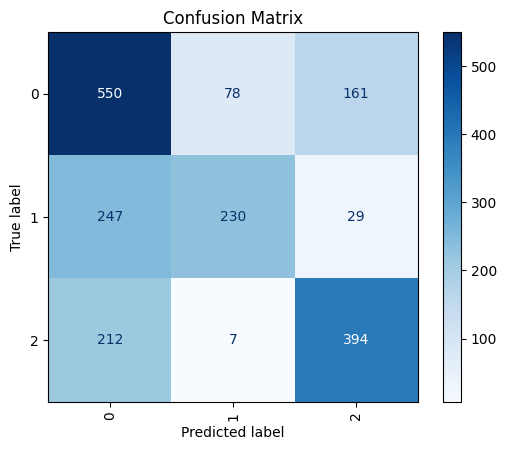

In [293]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [294]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.65


In [295]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.60


In [296]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.61


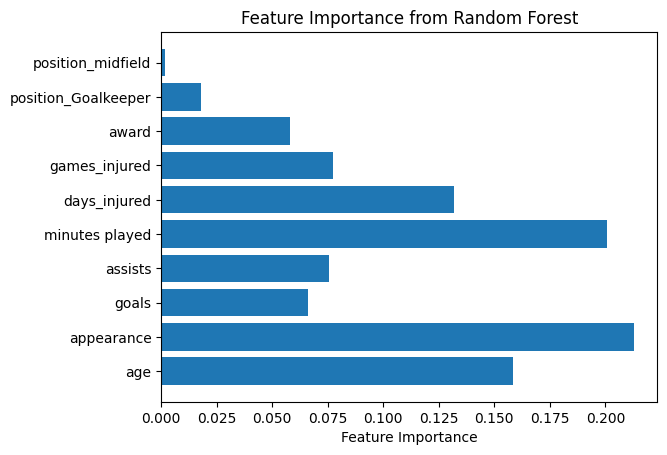

In [297]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()